In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [114]:
df=pd.read_csv("/content/mushroom.csv")
df

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

## **Exploratory Data Analysis (EDA)**

In [115]:
df.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [116]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [117]:
le=LabelEncoder()
for i in df.columns:
  df[i]=le.fit_transform(df[i])

In [118]:
df

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0             4            2          7        0     1                1   
1             4            0          6        0     1                3   
2             3            1          5        1     4                1   
3             0            2          4        1     3                3   
4             3            3          8        1     5                2   
...         ...          ...        ...      ...   ...              ...   
1995          4            2          0        1     4                0   
1996          4            2          5        1     5                0   
1997          2            1          3        1     3                3   
1998          0            3          7        0     7                2   
1999          2            2          8        1     7                1   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0                2          0           7            1  ...          0   
1                1          1           3            0  ...          1   
2                1          0           8            1  ...          1   
3                0          0           6            0  ...          0   
4                1          1           6            0  ...          1   
...            ...        ...         ...          ...  ...        ...   
1995             1          1           3            1  ...          0   
1996             2          1           9            1  ...          0   
1997             0          1           7            1  ...          0   
1998             0          1           6            0  ...          1   
1999             0          1           8            0  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1995           1            1          2                  6           0   
1996           2            1          7                  8           2   
1997           0            2          1                  8           0   
1998           3            1          0                  1           5   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1           916           190  
1           5      0           128           750  
2           5      1           537           281  
3           0      1           234           829  
4           4      1           895           484  
...       ...    ...           ...           ...  
1995        1      1           283           680  
1996        5      1           335           521  
1997        6      1           859           438  
1998        6      1           679           320  
1999        4      1           825           832  

[2000 rows x 25 columns]

In [119]:
df.describe()

cap_shape  cap_surface    cap_color      bruises         odor  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      2.052500     1.556000     3.862000     0.511500     3.988500   
std       1.435888     1.114668     2.626672     0.499993     2.542361   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     2.000000     0.000000     2.000000   
50%       2.000000     2.000000     4.000000     1.000000     4.000000   
75%       3.000000     3.000000     6.000000     1.000000     6.000000   
max       4.000000     3.000000     8.000000     1.000000     8.000000   

       gill_attachment  gill_spacing    gill_size   gill_color  stalk_shape  \
count      2000.000000    2000.00000  2000.000000  2000.000000  2000.000000   
mean          1.561500       1.00650     0.503500     5.348000     0.480000   
std           1.126433       0.81902     0.500113     3.388752     0.499725   
min           0.000000       0.00000     0.000000     0.000000     0.000000   
25%           1.000000       0.00000     0.000000     2.000000     0.000000   
50%           2.000000       1.00000     1.000000     5.000000     0.000000   
75%           3.000000       2.00000     1.000000     8.000000     1.000000   
max           3.000000       2.00000     1.000000    11.000000     1.000000   

       ...  veil_type   veil_color  ring_number    ring_type  \
count  ...  2000.0000  2000.000000  2000.000000  2000.000000   
mean   ...     0.5050     1.455500     0.990500     3.562000   
std    ...     0.5001     1.117875     0.809776     2.294295   
min    ...     0.0000     0.000000     0.000000     0.000000   
25%    ...     0.0000     0.000000     0.000000     2.000000   
50%    ...     1.0000     2.000000     1.000000     4.000000   
75%    ...     1.0000     2.000000     2.000000     6.000000   
max    ...     1.0000     3.000000     2.000000     7.000000   

       spore_print_color   population      habitat        class  stalk_height  \
count        2000.000000  2000.000000  2000.000000  2000.000000    2000.00000   
mean            3.905500     2.458000     3.070000     0.700000     478.79400   
std             2.619351     1.732263     1.971559     0.458372     281.44026   
min             0.000000     0.000000     0.000000     0.000000       0.00000   
25%             1.000000     1.000000     1.000000     0.000000     238.00000   
50%             4.000000     2.000000     3.000000     1.000000     478.50000   
75%             6.000000     4.000000     5.000000     1.000000     729.25000   
max             8.000000     5.000000     6.000000     1.000000     972.00000   

       cap_diameter  
count   2000.000000  
mean     476.150500  
std      284.323836  
min        0.000000  
25%      227.750000  
50%      462.500000  
75%      734.250000  
max      975.000000  

[8 rows x 25 columns]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap_shape                 2000 non-null   int64
 1   cap_surface               2000 non-null   int64
 2   cap_color                 2000 non-null   int64
 3   bruises                   2000 non-null   int64
 4   odor                      2000 non-null   int64
 5   gill_attachment           2000 non-null   int64
 6   gill_spacing              2000 non-null   int64
 7   gill_size                 2000 non-null   int64
 8   gill_color                2000 non-null   int64
 9   stalk_shape               2000 non-null   int64
 10  stalk_root                2000 non-null   int64
 11  stalk_surface_above_ring  2000 non-null   int64
 12  stalk_surface_below_ring  2000 non-null   int64
 13  stalk_color_above_ring    2000 non-null   int64
 14  stalk_color_below_ring    2000 non-null 

In [121]:
df.isna().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

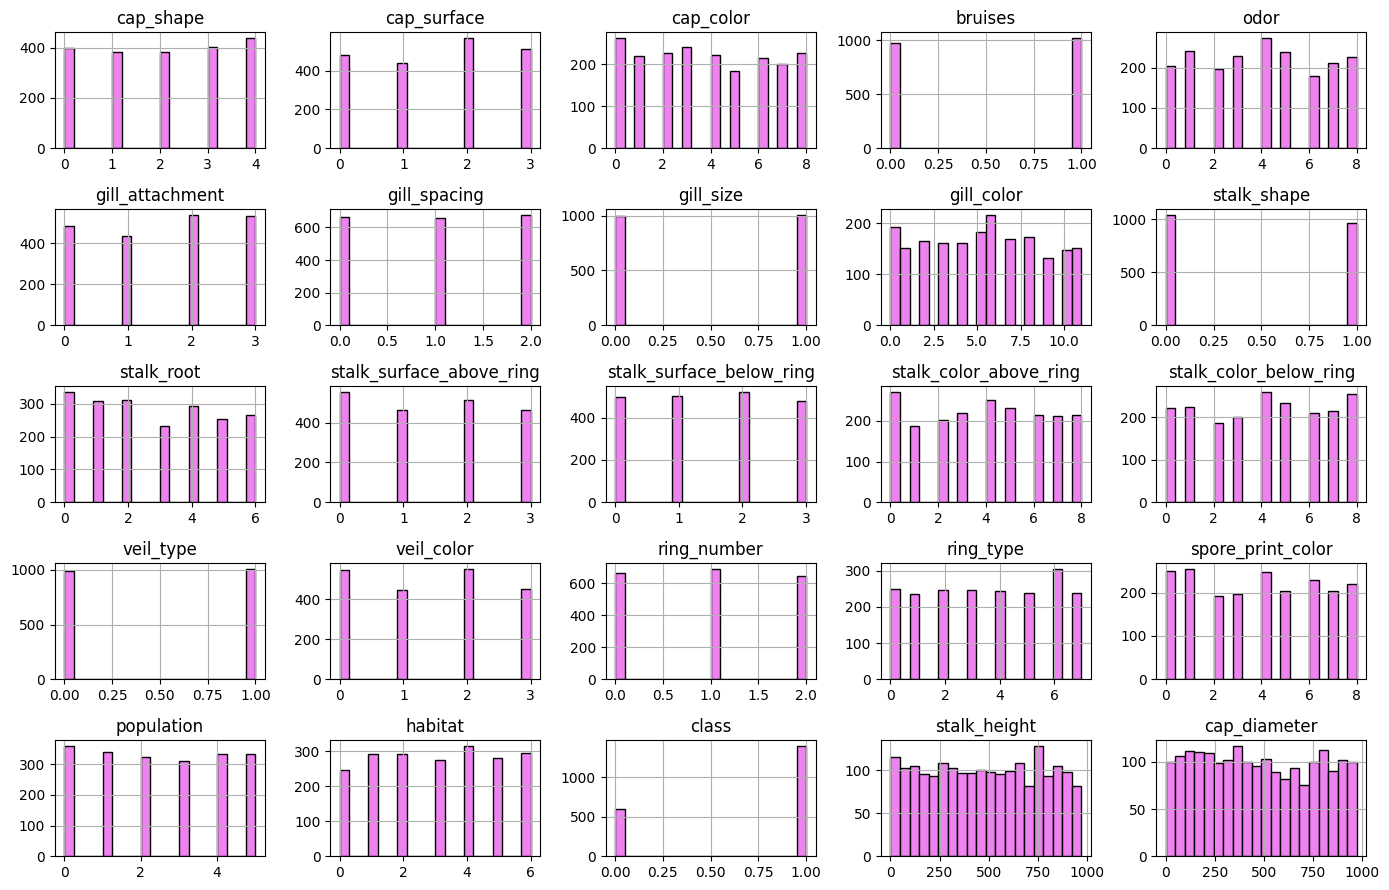

In [122]:
df.hist(bins=20,color='violet',edgecolor='black',figsize=(14,9))
plt.tight_layout()
plt.show()

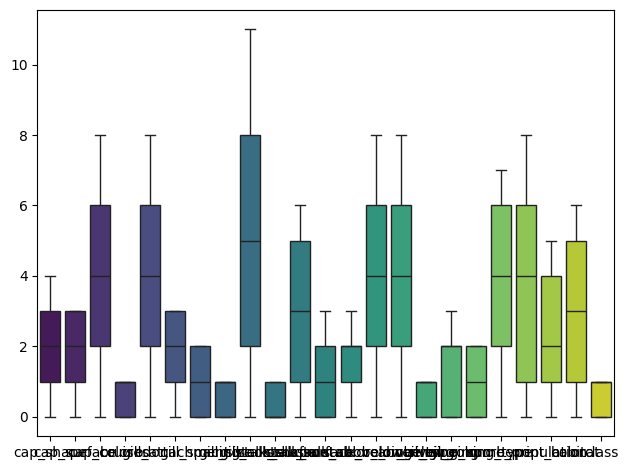

In [123]:
sns.boxplot(data=df.drop(columns=["stalk_height","cap_diameter"]),palette='viridis')
plt.tight_layout()
plt.show()

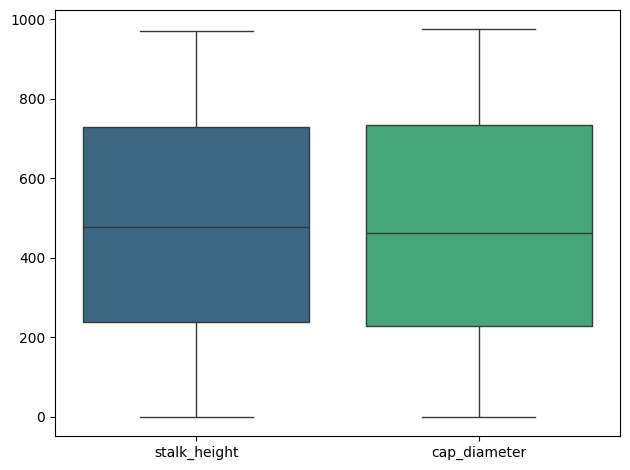

In [124]:
sns.boxplot(data=df.iloc[:,-2:],palette='viridis')
plt.tight_layout()
plt.show()

In [125]:
df.corr()

cap_shape  cap_surface  cap_color   bruises  \
cap_shape                  1.000000    -0.003244   0.009615 -0.001190   
cap_surface               -0.003244     1.000000   0.003153 -0.021352   
cap_color                  0.009615     0.003153   1.000000  0.016445   
bruises                   -0.001190    -0.021352   0.016445  1.000000   
odor                      -0.030119    -0.021926  -0.065410  0.026274   
gill_attachment            0.015477    -0.010513   0.023835  0.009402   
gill_spacing              -0.048783     0.068918  -0.015628 -0.004458   
gill_size                  0.040497    -0.038490   0.009888  0.041851   
gill_color                 0.032123     0.045561  -0.005898 -0.035135   
stalk_shape                0.011573    -0.024032  -0.020397  0.007928   
stalk_root                 0.057405    -0.008284  -0.004423 -0.014604   
stalk_surface_above_ring  -0.030537     0.016799  -0.019983 -0.043735   
stalk_surface_below_ring  -0.000870    -0.000493   0.000528 -0.013857   
stalk_color_above_ring    -0.021350    -0.048534   0.038920  0.009374   
stalk_color_below_ring     0.027522    -0.011742   0.036951 -0.077316   
veil_type                 -0.039029    -0.068705  -0.020039  0.016775   
veil_color                -0.017399     0.040341  -0.036166 -0.053680   
ring_number                0.036999     0.005855   0.055593 -0.022588   
ring_type                  0.010172     0.017616   0.021509 -0.028750   
spore_print_color          0.024596    -0.042134   0.082155 -0.026481   
population                 0.003602    -0.003963  -0.027551  0.012976   
habitat                    0.028388    -0.038661  -0.025568  0.013392   
class                      0.001140    -0.046409  -0.078029 -0.015498   
stalk_height               0.023586     0.043168   0.043899  0.066449   
cap_diameter               0.038942     0.016084  -0.000427 -0.045774   

                              odor  gill_attachment  gill_spacing  gill_size  \
cap_shape                -0.030119         0.015477     -0.048783   0.040497   
cap_surface              -0.021926        -0.010513      0.068918  -0.038490   
cap_color                -0.065410         0.023835     -0.015628   0.009888   
bruises                   0.026274         0.009402     -0.004458   0.041851   
odor                      1.000000        -0.055214     -0.002847  -0.027313   
gill_attachment          -0.055214         1.000000     -0.063604   0.009386   
gill_spacing             -0.002847        -0.063604      1.000000  -0.022650   
gill_size                -0.027313         0.009386     -0.022650   1.000000   
gill_color               -0.051793         0.035279     -0.010729  -0.054736   
stalk_shape               0.009072        -0.018698      0.051041  -0.046759   
stalk_root               -0.005430        -0.013484      0.000668   0.079320   
stalk_surface_above_ring  0.063281        -0.021187     -0.031336  -0.033849   
stalk_surface_below_ring  0.005568        -0.009479     -0.043794   0.033913   
stalk_color_above_ring   -0.006393         0.011811     -0.045491  -0.067307   
stalk_color_below_ring   -0.007103         0.007839      0.003012  -0.025614   
veil_type                 0.028177        -0.042727     -0.016567  -0.029072   
veil_color                0.015397        -0.023648      0.004960  -0.016722   
ring_number              -0.068819         0.080437      0.024984  -0.005476   
ring_type                 0.033956        -0.006025      0.001516  -0.028746   
spore_print_color        -0.057705         0.039356      0.016376   0.039395   
population               -0.011753        -0.002649     -0.004920   0.018937   
habitat                  -0.051237         0.005944      0.004055  -0.004307   
class                     0.039536        -0.028194      0.046505   0.019858   
stalk_height              0.012637        -0.015984      0.014766  -0.001054   
cap_diameter             -0.054402        -0.041098      0.030303  -0.068738   

                          gill_color  stalk_sh

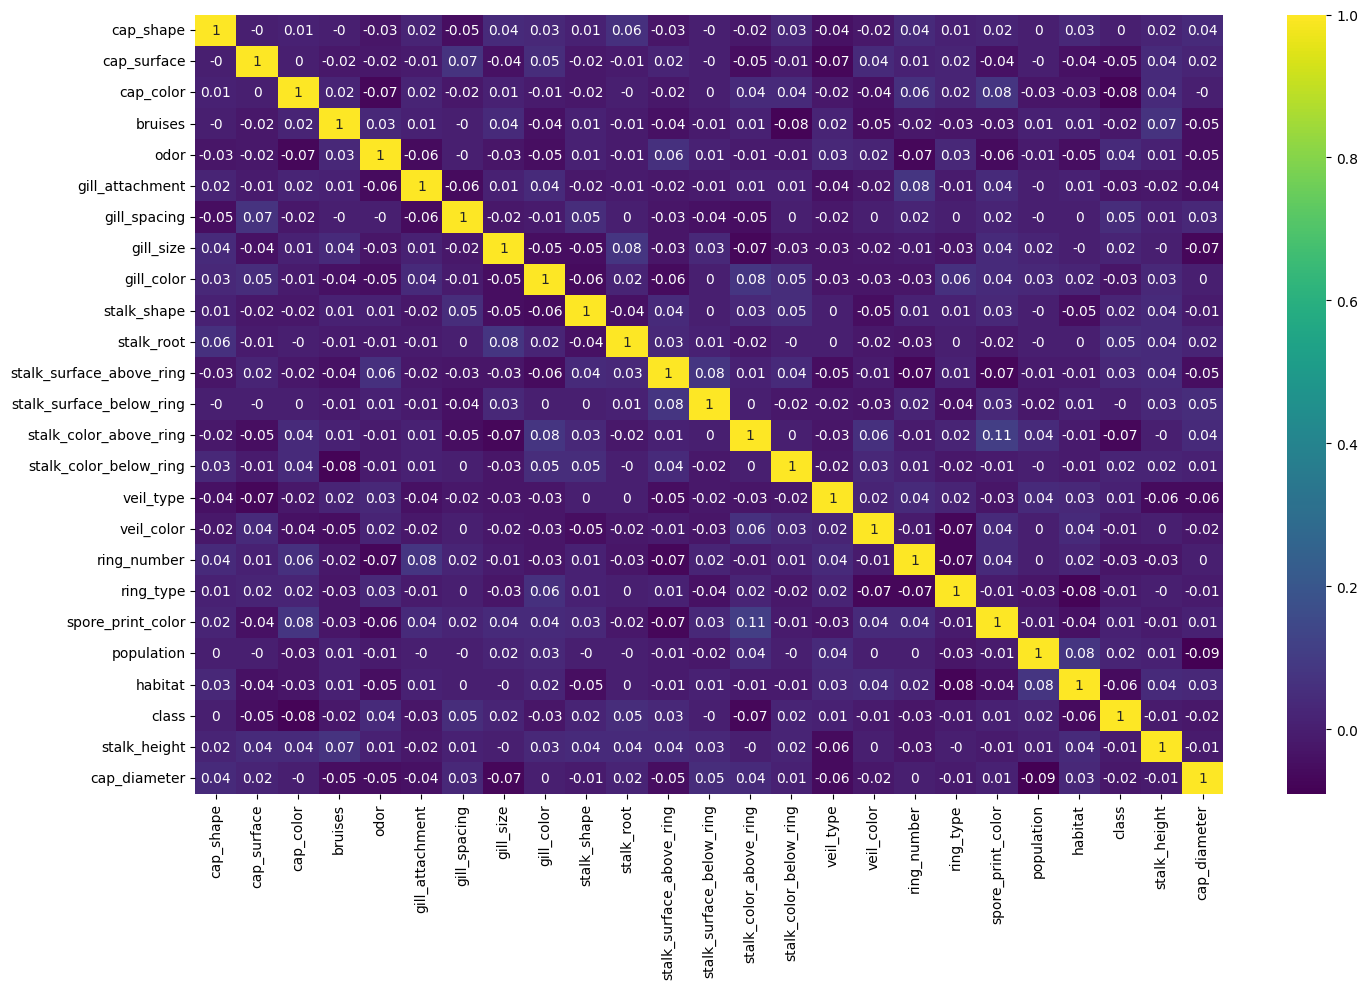

In [126]:
plt.figure(figsize=(15, 10))
sns.heatmap(np.round(df.corr(),2),annot=True,cmap='viridis')
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

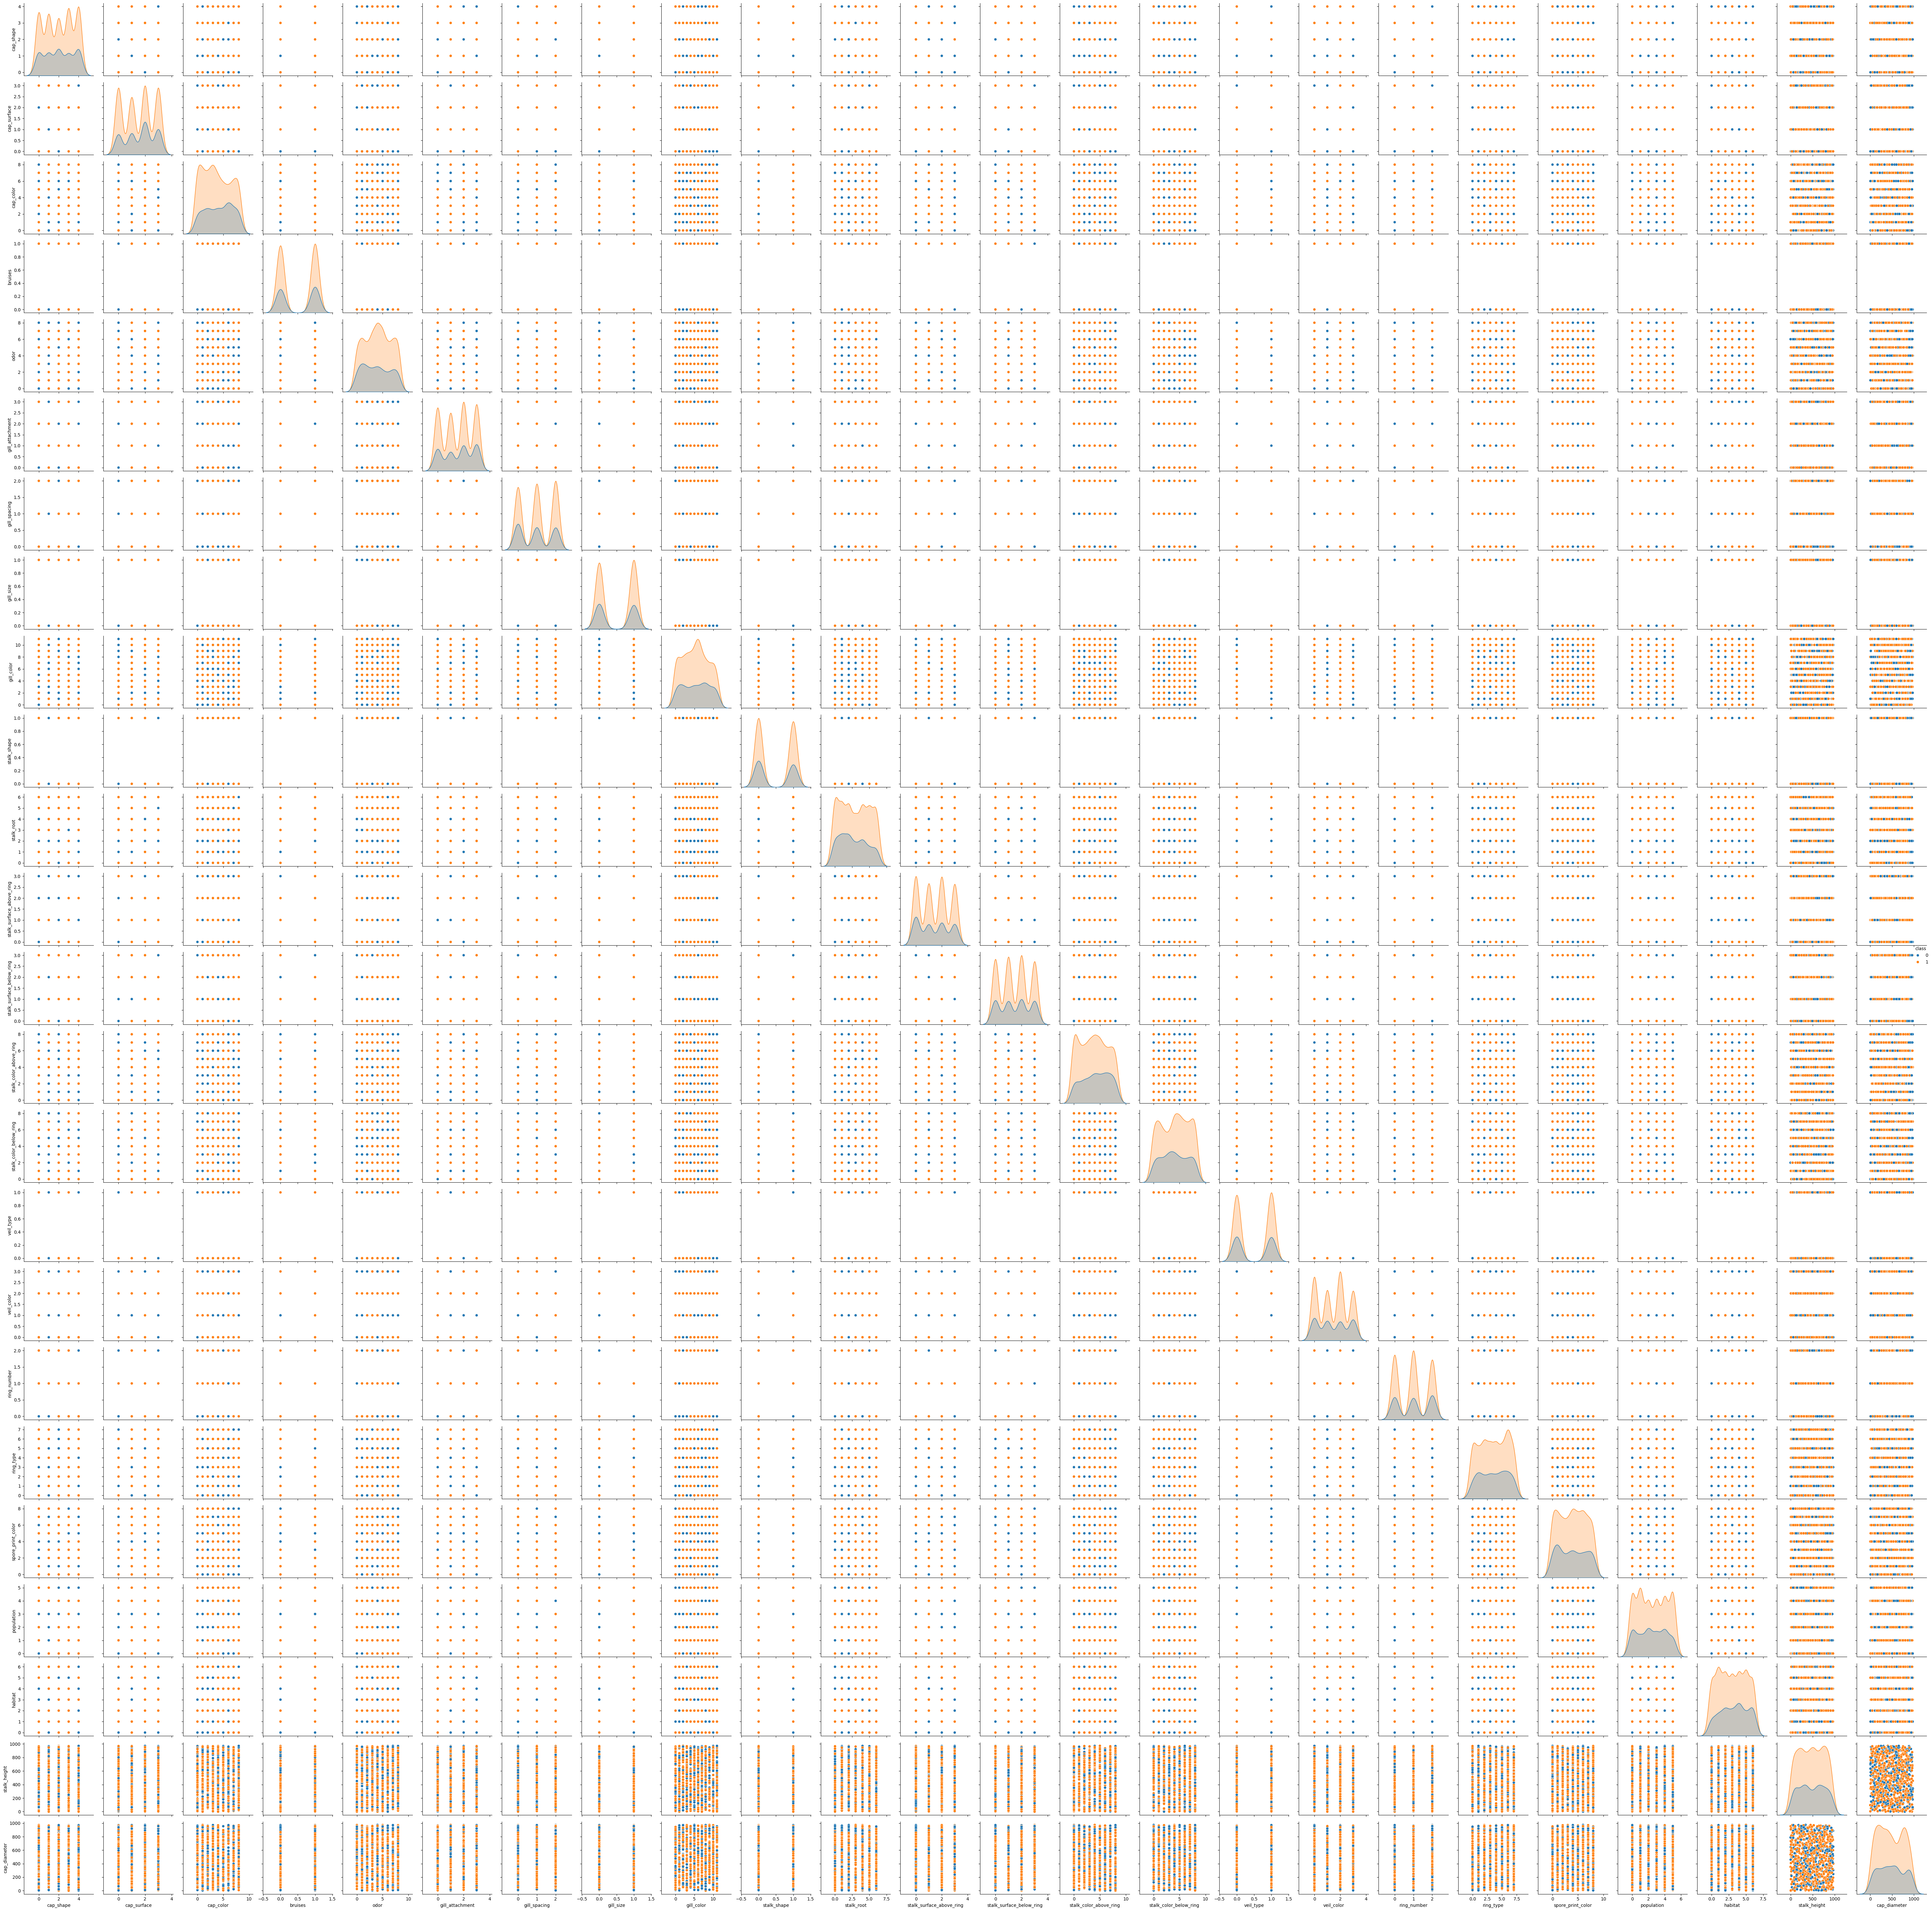

In [127]:

plt.figure(figsize=(15, 10))
sns.pairplot(df,hue="class")
plt.tight_layout()
plt.show()

<Axes: xlabel='cap_color', ylabel='population'>

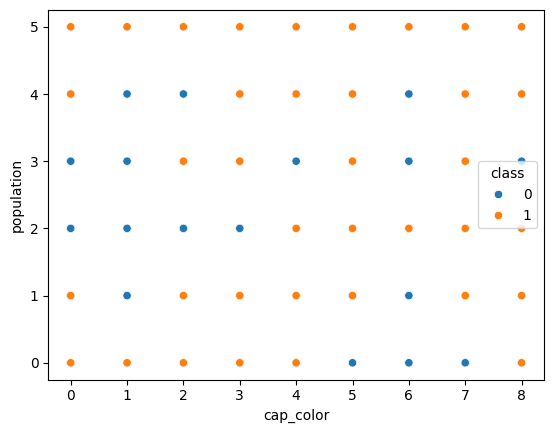

In [128]:
sns.scatterplot(x="cap_color",y='population',hue='class',data=df,)

In [129]:
df['class'].value_counts()

class
1    1400
0     600
Name: count, dtype: int64

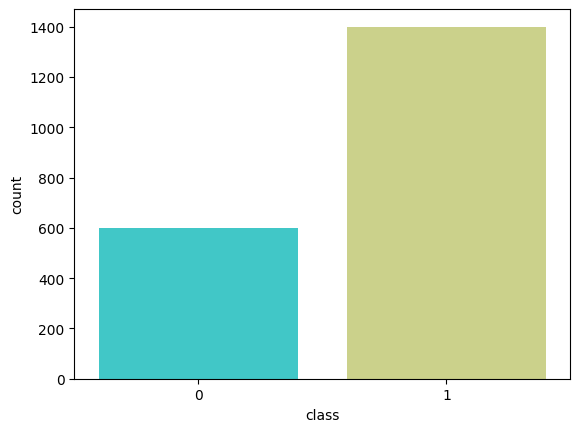

In [130]:
sns.countplot(x='class', data=df,palette='rainbow')
plt.show()

In [131]:
x=df.drop('class',axis=1)
y=df['class']

In [132]:
x

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0             4            2          7        0     1                1   
1             4            0          6        0     1                3   
2             3            1          5        1     4                1   
3             0            2          4        1     3                3   
4             3            3          8        1     5                2   
...         ...          ...        ...      ...   ...              ...   
1995          4            2          0        1     4                0   
1996          4            2          5        1     5                0   
1997          2            1          3        1     3                3   
1998          0            3          7        0     7                2   
1999          2            2          8        1     7                1   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0                2          0           7            1  ...   
1                1          1           3            0  ...   
2                1          0           8            1  ...   
3                0          0           6            0  ...   
4                1          1           6            0  ...   
...            ...        ...         ...          ...  ...   
1995             1          1           3            1  ...   
1996             2          1           9            1  ...   
1997             0          1           7            1  ...   
1998             0          1           6            0  ...   
1999             0          1           8            0  ...   

      stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                          8          0           0            2          6   
1                          0          1           0            2          6   
2                          3          1           3            2          6   
3                          5          0           3            2          0   
4                          7          1           2            0          4   
...                      ...        ...         ...          ...        ...   
1995                       4          0           1            1          2   
1996                       4          0           2            1          7   
1997                       6          0           0            2          1   
1998                       5          1           3            1          0   
1999                       0          0           2            2          3   

      spore_print_color  population  habitat  stalk_height  cap_diameter  
0                     3           1        5           916           190  
1                     1           2        5           128           750  
2                     6           0        5           537           281  
3                     4           1        0           234           829  
4                     8           1        4           895           484  
...                 ...         ...      ...           ...           ...  
1995                  6           0        1           283           680  
1996                  8           2        5           335           521  
1997                  8           0        6           859           438  
1998                  1           5        6           679           320  
1999                  7           2        4           825           832  

[2000 rows x 24 columns]

In [133]:
y


0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int64

In [134]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[ 1.35664266,  0.39842442,  1.19496641, ...,  0.97916574,
         1.55384785, -1.00667629],
       [ 1.35664266, -1.39628018,  0.81416131, ...,  0.97916574,
        -1.2467361 ,  0.96340142],
       [ 0.66003539, -0.49892788,  0.43335621, ...,  0.97916574,
         0.20686648, -0.68653866],
       ...,
       [-0.03657188, -0.49892788, -0.328254  , ...,  1.4865055 ,
         1.35126754, -0.1342133 ],
       [-1.42978643,  1.29577672,  1.19496641, ...,  1.4865055 ,
         0.71154024, -0.54933682],
       [-0.03657188,  0.39842442,  1.57577151, ...,  0.47182598,
         1.23043016,  1.25187709]])

In [135]:
x=pd.DataFrame(x1,columns=x.columns)
x

cap_shape  cap_surface  cap_color   bruises      odor  gill_attachment  \
0      1.356643     0.398424   1.194966 -1.023271 -1.175776        -0.498601   
1      1.356643    -1.396280   0.814161 -1.023271 -1.175776         1.277359   
2      0.660035    -0.498928   0.433356  0.977259  0.004524        -0.498601   
3     -1.429786     0.398424   0.052551  0.977259 -0.388909         1.277359   
4      0.660035     1.295777   1.575772  0.977259  0.397958         0.389379   
...         ...          ...        ...       ...       ...              ...   
1995   1.356643     0.398424  -1.470669  0.977259  0.004524        -1.386580   
1996   1.356643     0.398424   0.433356  0.977259  0.397958        -1.386580   
1997  -0.036572    -0.498928  -0.328254  0.977259 -0.388909         1.277359   
1998  -1.429786     1.295777   1.194966 -1.023271  1.184825         0.389379   
1999  -0.036572     0.398424   1.575772  0.977259  1.184825        -0.498601   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0         1.213339  -1.007025    0.487617     1.040833  ...   
1        -0.007938   0.993024   -0.693054    -0.960769  ...   
2        -0.007938  -1.007025    0.782785     1.040833  ...   
3        -1.229216  -1.007025    0.192449    -0.960769  ...   
4        -0.007938   0.993024    0.192449    -0.960769  ...   
...            ...        ...         ...          ...  ...   
1995     -0.007938   0.993024   -0.693054     1.040833  ...   
1996      1.213339   0.993024    1.077953     1.040833  ...   
1997     -1.229216   0.993024    0.487617     1.040833  ...   
1998     -1.229216   0.993024    0.192449    -0.960769  ...   
1999     -1.229216   0.993024    0.782785    -0.960769  ...   

      stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                   1.503079  -1.010051   -1.302350     1.246952   1.062902   
1                  -1.572275   0.990050   -1.302350     1.246952   1.062902   
2                  -0.419017   0.990050    1.381985     1.246952   1.062902   
3                   0.349822  -1.010051    1.381985     1.246952  -1.552935   
4                   1.118660   0.990050    0.487207    -1.223483   0.190956   
...                      ...        ...         ...          ...        ...   
1995               -0.034598  -1.010051   -0.407571     0.011735  -0.680990   
1996               -0.034598  -1.010051    0.487207     0.011735   1.498875   
1997                0.734241  -1.010051   -1.302350     1.246952  -1.116962   
1998                0.349822   0.990050    1.381985     0.011735  -1.552935   
1999               -1.572275  -1.010051    0.487207     1.246952  -0.245017   

      spore_print_color  population   habitat  stalk_height  cap_diameter  
0             -0.345783   -0.841884  0.979166      1.553848     -1.006676  
1             -1.109522   -0.264460  0.979166     -1.246736      0.963401  
2              0.799826   -1.419308  0.979166      0.206866     -0.686539  
3              0.036087   -0.841884 -1.557533     -0.870008      1.241323  
4              1.563564   -0.841884  0.471826      1.479213      0.027615  
...                 ...         ...       ...           ...           ...  
1995           0.799826   -1.419308 -1.050193     -0.695860      0.717142  
1996           1.563564   -0.264460  0.979166     -0.511050      0.157780  
1997           1.563564   -1.419308  1.486505      1.351268     -0.134213  
1998          -1.109522    1.467811  1.486505      0.711540     -0.549337  
1999           1.181695   -0.264460  0.471826      1.230430      1.251877  

[2000 rows x 24 columns]

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [137]:
x_train

cap_shape  cap_surface  cap_color   bruises      odor  gill_attachment  \
968    1.356643    -1.396280   0.052551 -1.023271  1.184825         0.389379   
240    0.660035    -1.396280   0.814161  0.977259  0.791392         0.389379   
819   -0.733179    -0.498928  -1.470669 -1.023271 -0.388909        -0.498601   
692    1.356643     0.398424  -0.709059  0.977259  0.004524         0.389379   
420    1.356643     1.295777   1.194966  0.977259  0.397958        -1.386580   
...         ...          ...        ...       ...       ...              ...   
1130   1.356643     0.398424   1.575772 -1.023271 -1.175776         1.277359   
1294  -0.733179    -0.498928   0.814161  0.977259  0.004524         1.277359   
860    0.660035     1.295777  -1.470669 -1.023271  0.004524        -1.386580   
1459   1.356643    -0.498928   1.575772 -1.023271 -1.175776        -0.498601   
1126   0.660035     1.295777   0.814161  0.977259 -1.569210         1.277359   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  \
968       1.213339   0.993024    0.192449    -0.960769  ...   
240      -1.229216   0.993024    1.373120    -0.960769  ...   
819       1.213339  -1.007025    1.668288     1.040833  ...   
692       1.213339   0.993024   -0.988222     1.040833  ...   
420      -0.007938   0.993024    0.487617    -0.960769  ...   
...            ...        ...         ...          ...  ...   
1130     -1.229216  -1.007025    0.782785     1.040833  ...   
1294      1.213339   0.993024    0.782785    -0.960769  ...   
860       1.213339  -1.007025    0.192449    -0.960769  ...   
1459     -0.007938  -1.007025   -0.397886    -0.960769  ...   
1126     -0.007938   0.993024   -0.102718     1.040833  ...   

      stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
968                 1.503079  -1.010051   -0.407571     0.011735  -0.245017   
240                -0.034598  -1.010051   -0.407571     0.011735  -1.116962   
819                 1.503079  -1.010051   -1.302350     0.011735  -0.680990   
692                 0.349822  -1.010051    0.487207     0.011735  -0.680990   
420                -0.803436   0.990050   -0.407571    -1.223483  -1.552935   
...                      ...        ...         ...          ...        ...   
1130               -0.034598  -1.010051   -1.302350    -1.223483   1.062902   
1294                1.503079  -1.010051   -1.302350    -1.223483   0.626929   
860                -0.034598  -1.010051    1.381985     1.246952  -1.552935   
1459                1.118660  -1.010051    0.487207    -1.223483   0.626929   
1126               -0.419017  -1.010051   -0.407571     0.011735   0.190956   

      spore_print_color  population   habitat  stalk_height  cap_diameter  
968            0.036087    0.312964 -0.542854      0.569379      0.544760  
240           -1.109522   -0.264460  1.486505     -0.631887      0.404040  
819            0.036087   -1.419308  0.979166     -0.461293     -1.059446  
692            1.181695   -1.419308 -0.542854     -0.024146      0.696034  
420           -0.727652   -0.841884 -1.557533      1.610712     -0.412135  
...                 ...         ...       ...           ...           ...  
1130          -0.727652    0.312964  1.486505      0.686662      0.136672  
1294          -0.727652    0.312964 -1.557533     -1.602140     -0.489531  
860           -0.345783    0.890387  0.979166     -1.342695     -0.369919  
1459           0.799826    0.890387  0.979166     -0.621225      1.382043  
1126           0.799826    0.890387  1.486505     -0.539482      1.554425  

[1600 rows x 24 columns]

In [138]:
x_test

cap_shape  cap_surface  cap_color   bruises      odor  gill_attachment  \
1860   1.356643     1.295777   0.814161 -1.023271 -1.175776        -0.498601   
353    0.660035     1.295777  -1.470669  0.977259 -1.175776        -0.498601   
1333   0.660035    -0.498928   0.052551  0.977259 -0.782343         0.389379   
905    0.660035    -1.396280  -1.089864  0.977259  1.184825        -1.386580   
1289   0.660035     0.398424   0.814161  0.977259  0.397958         0.389379   
...         ...          ...        ...       ...       ...              ...   
965   -0.733179     1.295777  -0.328254  0.977259  0.791392         0.389379   
1284   1.356643     0.398424   0.814161 -1.023271 -1.569210        -1.386580   
1739   0.660035     0.398424  -1.470669  0.977259 -0.782343         0.389379   
261    1.356643     0.398424  -0.328254 -1.023271  1.578259        -1.386580   
535    0.660035    -0.498928   0.052551  0.977259 -0.782343         0.389379   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  \
1860     -0.007938  -1.007025    0.192449     1.040833  ...   
353      -1.229216   0.993024    0.192449    -0.960769  ...   
1333     -1.229216  -1.007025    1.668288    -0.960769  ...   
905       1.213339   0.993024   -1.283389    -0.960769  ...   
1289      1.213339  -1.007025   -0.693054     1.040833  ...   
...            ...        ...         ...          ...  ...   
965      -0.007938  -1.007025    0.192449    -0.960769  ...   
1284     -0.007938   0.993024   -0.693054     1.040833  ...   
1739      1.213339   0.993024    0.192449     1.040833  ...   
261      -1.229216  -1.007025   -1.283389    -0.960769  ...   
535      -1.229216   0.993024    1.373120    -0.960769  ...   

      stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
1860               -1.187855  -1.010051    0.487207     0.011735   1.062902   
353                -1.572275   0.990050    1.381985    -1.223483   0.626929   
1333                0.734241  -1.010051   -1.302350     0.011735   0.626929   
905                -0.034598  -1.010051    0.487207    -1.223483   0.626929   
1289                1.503079   0.990050    0.487207     1.246952  -0.245017   
...                      ...        ...         ...          ...        ...   
965                -0.419017  -1.010051    1.381985     0.011735   1.498875   
1284               -1.572275  -1.010051   -0.407571     1.246952   0.190956   
1739               -1.572275  -1.010051    1.381985     1.246952   1.498875   
261                -0.803436   0.990050    0.487207     1.246952  -1.552935   
535                 0.349822   0.990050    1.381985     1.246952   1.062902   

      spore_print_color  population   habitat  stalk_height  cap_diameter  
1860           1.181695   -0.841884 -1.557533     -0.916210     -0.327703  
353            0.799826    0.890387 -0.035514      1.354822     -1.207202  
1333          -1.491391    0.312964  1.486505      1.401024     -0.486013  
905            1.181695    1.467811 -0.035514     -0.521712     -0.668949  
1289          -1.491391   -0.264460 -0.035514      0.533838      0.182406  
...                 ...         ...       ...           ...           ...  
965            0.799826   -0.841884 -1.050193     -0.009930     -1.636398  
1284          -0.345783    0.312964  1.486505     -1.076142      0.010025  
1739           1.181695    1.467811  0.471826     -1.228966     -1.013712  
261            0.799826   -0.841884 -1.557533     -1.534613      1.346863  
535            0.417956    0.312964 -0.035514      0.860810      1.290575  

[400 rows x 24 columns]

In [139]:
y_train

968     0
240     1
819     1
692     1
420     1
       ..
1130    0
1294    1
860     1
1459    1
1126    0
Name: class, Length: 1600, dtype: int64

In [140]:
y_test

1860    1
353     1
1333    0
905     1
1289    0
       ..
965     1
1284    1
1739    1
261     1
535     1
Name: class, Length: 400, dtype: int64

In [141]:
svc=SVC()
model=svc.fit(x_train,y_train)

In [142]:
predict=model.predict(x_test)
predict

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [143]:
print("Training accuracy:",svc.score(x_train,y_train))
print("Testing accuracy:",svc.score(x_test,y_test))

Training accuracy: 0.880625
Testing accuracy: 0.785


In [144]:
# hyper parameter tuning
params={
    'C':[0.1,0.001,1,2,3,4,5,6,7,8,9,10],
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma':[0.1,0.001,1,2,3,4,5]

  }


In [145]:
grid=GridSearchCV(SVC(),param_grid=params,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.706 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.706 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.709 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.709 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.709 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.819 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.816 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.841 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.806 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.812 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=r

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.1, 0.001, 1, 2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [148]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [149]:
svc=SVC(C=1,gamma=1,kernel='rbf')
model=svc.fit(x_train,y_train)

In [150]:
pred=model.predict(x_test)
pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [151]:
print("Training accuracy:",svc.score(x_train,y_train))
print("Testing accuracy:",svc.score(x_test,y_test))

Training accuracy: 1.0
Testing accuracy: 0.885


In [152]:
pd.crosstab(y_test,pred)

col_0   0    1
class         
0      87   46
1       0  267

In [155]:
accuracy=accuracy_score(y_test,pred)
precision=precision_score(y_test,pred,average='weighted')
recall=recall_score(y_test,pred,average='weighted')
f1=f1_score(y_test,pred,average='weighted')
classification_rep=classification_report(y_test,pred)

In [156]:
print(accuracy)
print(precision)
print(recall)
print(f1)
print(classification_rep)

0.885
0.9019009584664537
0.885
0.8775376175548589
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



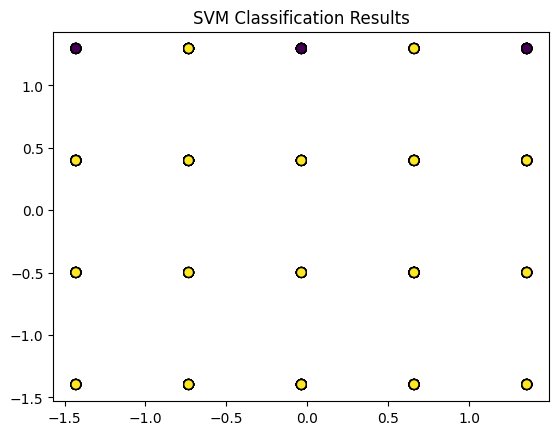

In [157]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=pred, cmap='viridis', edgecolor='k', s=50)
plt.title("SVM Classification Results")
plt.show()